# 입문자를 위한, 파이썬/R 데이터 분석  

## Part(2) - Day20  :

]

## Today's mission

- Ensemble Learinig (개념, 하드보팅, 소프트보팅)
- ML 데이터 처리 관련 추가정리 (LabelEncoder, Scaler, Validation)

]

## Ensemble Learning


- 개념 : 여러 개의 Classifer를 생성하고, 각 예측을 결합함으로써 보다 정확한 최종 예측(Predict) 을 도출하는 기법

##  앙상블 학습

이론 : https://formal.hknu.ac.kr/handson-ml2/slides/handson-ml2-07-slides.pdf

실습 : https://injo.tistory.com/22

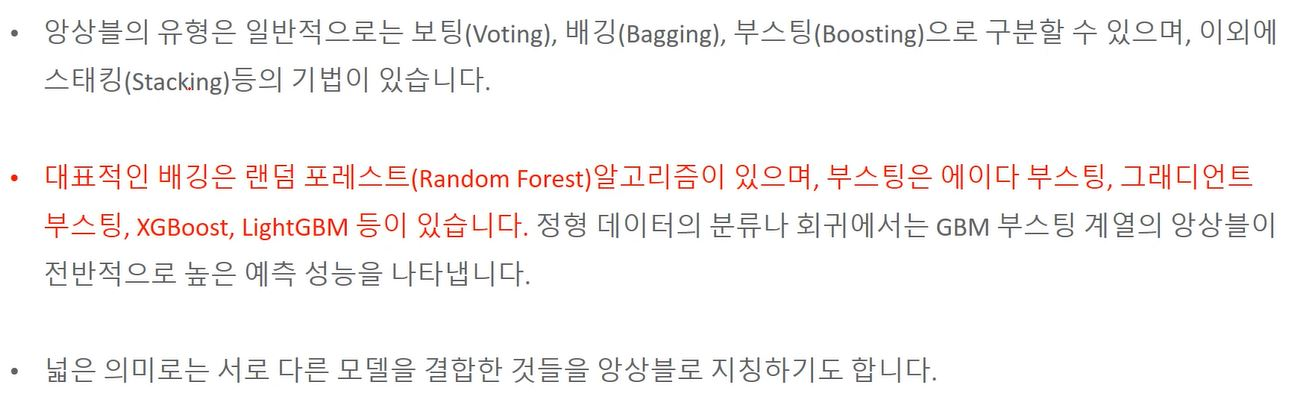

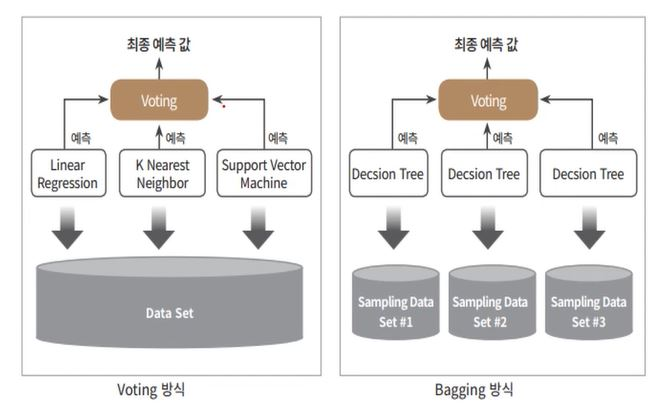

** 추가 : Voting 유형 **

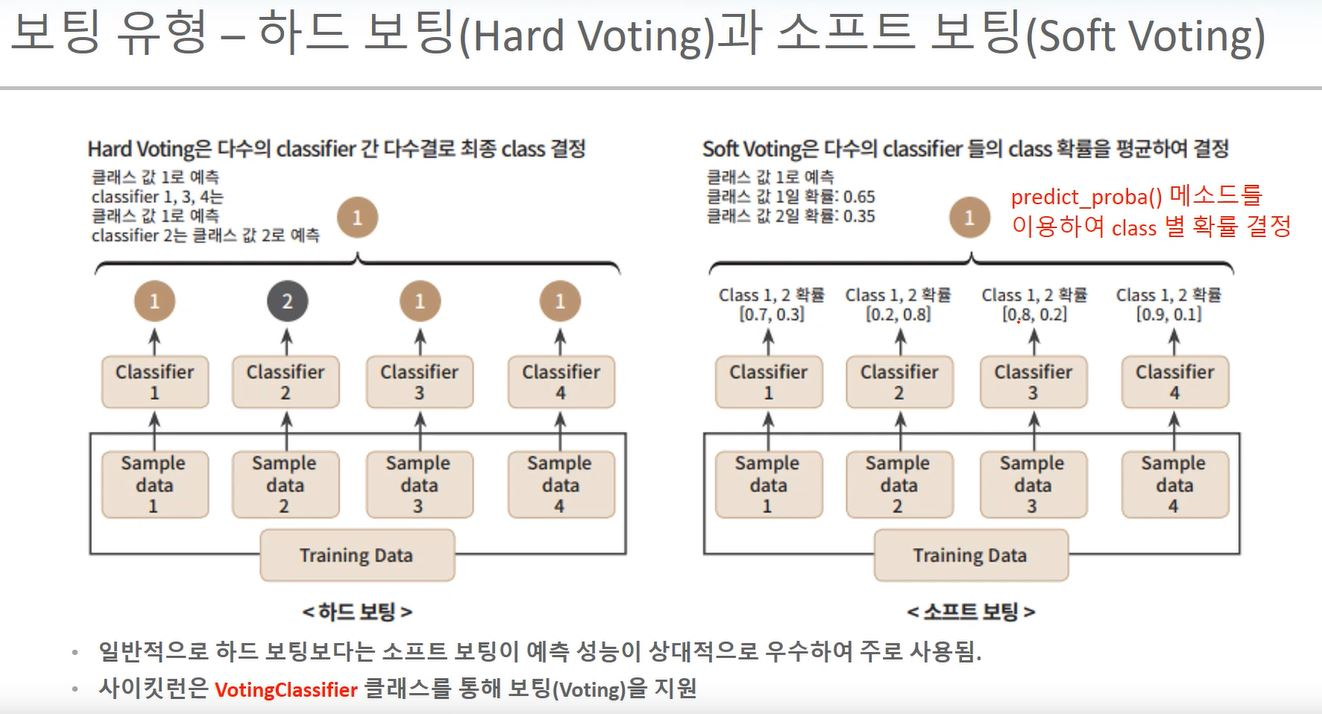

### 예제 : Voting Classifier

**위스콘신 유방암 데이터 로드**

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

**VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교**

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [ ]:
lr_clf

In [ ]:
knn_clf

In [ ]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )
vo_clf

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)

In [ ]:
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

In [ ]:
# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

### ** Bagging**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=1)
dt_clf

In [ ]:
bag_clf = BaggingClassifier(base_estimator=dt_clf,
                            n_estimators=500,
                            max_samples=1.0,
                            max_features=1.0,
                            bootstrap=True,
                            bootstrap_features=False,
                            n_jobs=1,
                            random_state=1)
bag_clf

In [ ]:
clf_labels = ['Decision tree', 'Bagging']
all_clf = [dt_clf, bag_clf]

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10)
    print(f"Test data prediction accuracy {label} : {scores.mean():0.5f}")    

### ** Random Forest **

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=1)

In [ ]:
rf_clf = RandomForestClassifier(criterion='gini',
                            n_estimators=500,
                            random_state=1)

In [ ]:
clf_labels = ['Decision tree', 'Random forest']
all_clf = [dt_clf, rf_clf]
all_clf

In [ ]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10)
    print(f"Test data prediction accuracy {label} : {scores.mean():0.5f}")

### ** Boosting**

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm='SAMME.R',
                             learning_rate=0.5,
                             random_state=1)
ada_clf

In [ ]:
ada_clf.fit(X_train, y_train)

In [ ]:
ada_pred = ada_clf.predict(X_test)
ada_pred

In [ ]:
y_test

In [ ]:
accuracy = np.mean(ada_pred == y_test)
print(f"Test data prediction accuracy (Boosting) : {accuracy:0.5f}")

### ** Ensemble**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
dt_clf1 = DecisionTreeClassifier()
bag_clf2 = BaggingClassifier()
rf_clf3 = RandomForestClassifier()
ada_clf4 = AdaBoostClassifier()

In [ ]:
ensemble_classifier = VotingClassifier(estimators=[('DecisionTree',dt_clf1), ('Bagging', bag_clf2), 
                                                   ('RandomForest', rf_clf3), ('Boosting', ada_clf4)], 
                                       voting='soft')
ensemble_classifier

In [ ]:
e_clf = ensemble_classifier.fit(X_train, y_train)
e_clf

In [ ]:
e_clf_pred = ensemble_classifier.predict(X_test)
e_clf_pred

In [ ]:
ensemble_classifier.predict_proba(X_test)

In [ ]:
accuracy = np.mean(e_clf_pred == y_test)
print(f"Test data prediction accuracy (Ensemble) : {accuracy:0.5f}")

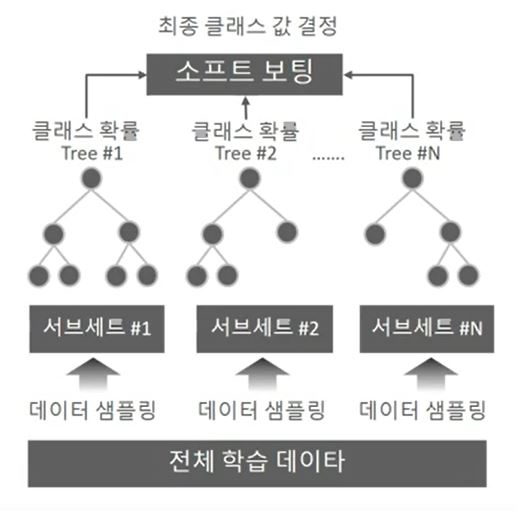